In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Monte Carlo Optimization

*"Remember, boy," Sam Nakai would sometimes tell Chee, "when you're tired of walking up a long hill you think about how easy it's going to be walking down."*  
– Tony Hillerman, *A Thief of Time*

This chapter is the equivalent for optimization problems of what Chapter 3 is for integration problems. Here, we distinguish between two separate uses of computer-generated random variables:  

1. **Stochastic Optimization Techniques**:  
   As seen in Section 5.2, these techniques aim to reach the maximum (or minimum) of a function by devising random exploration strategies on the surface of the function. These strategies help avoid being trapped in local maxima (or minima) while being sufficiently attracted to the global maximum (or minimum).  

2. **Function Approximation for Optimization**:  
   Described in Section 5.3, this approach is closer to the integration methods discussed in Chapter 3. It focuses on approximating the function to be optimized. The most popular algorithm in this context is the **Expectation-Maximization (EM) algorithm**.

---

##  Introduction

Similar to the problem of integration, differences between the **numerical approach** and the **simulation approach** to optimization lie in the treatment of the function $ h $.  

$$
\max h(\theta)
$$

(Note that minimization problems can also be handled by considering $-h$.)

When approaching an optimization problem, $\theta$ serves as the running parameter, and $ h $ typically corresponds to a (possibly penalized) transform of the likelihood function. However, this setup is not restricted to likelihood or posterior maximization.  

As noted in the introduction to Chapter 3, optimization procedures also apply to inferential problems involving complex loss functions or confidence regions.

## Deterministic vs Simulation-Based Methods

Using deterministic numerical methods, the analytical properties of the target function (e.g., convexity, boundedness, smoothness) are often paramount. In contrast, for the simulation approach, we are more concerned with $ h $ from a probabilistic perspective rather than an analytical one.  

While this dichotomy is somewhat artificial—there are simulation approaches where the probabilistic interpretation of $ h $ is not used—the use of analytical properties of $ h $ plays a lesser role in the simulation approach.  

Numerical methods have a longer history than simulation methods (see, for example, Kennedy and Gentle, 1980, or Thisted, 1988). However, simulation methods have gained appeal due to their ability to relax constraints on the regularity of both the domain and the function $ h $.  

Although an alternative numerical approach may provide an exact solution to:

$$
\max h(\theta),
$$

a property rarely achieved by stochastic algorithms, simulation has the advantage of bypassing preliminary steps such as devising an algorithm or verifying regularity conditions on $ h $. This is particularly advantageous when $ h $ is computationally expensive to evaluate.

---

### Example 5.1: Signal Processing

Ó Ruanaidh and Fitzgerald (1996) studied signal processing data, where a simple model is given by:

$$
x_i = a_1 \cos(w t_i) + a_2 \sin(w t_i) + \varepsilon_i, \quad \varepsilon_i \sim \mathcal{N}(0, \sigma^2), \quad i = 1, \dots, N,
$$

with unknown parameters $ a = (a_1, a_2) $, $ w $, and $ \sigma $, and observation times $ t_1, \dots, t_N $.  

The likelihood function is then of the form:

$$
L(a, w, \sigma^2) \propto \sigma^{-N} \exp\left(-\frac{1}{2\sigma^2} (x - G a)^\top (x - G a)\right),
$$

where:

$$
x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_N \end{bmatrix}, \quad 
G = \begin{bmatrix} 
\cos(w t_1) & \sin(w t_1) \\ 
\cos(w t_2) & \sin(w t_2) \\ 
\vdots & \vdots \\ 
\cos(w t_N) & \sin(w t_N) 
\end{bmatrix}.
$$

The prior $ p(a, w, \sigma) \propto 1 $ leads to the marginal distribution:

$$
p(w \mid x) \propto (\det(G^\top G))^{-1/2} \exp\left(-\frac{1}{2} (x^\top x - x^\top G (G^\top G)^{-1} G^\top x)\right),
$$

which, although explicit in $ w $, is not simple to compute. This setup is illustrative of functions with many modes, as highlighted by Ó Ruanaidh and Fitzgerald (1996).

---

### Monte Carlo Optimization Approaches

Following Geyer (1996), Monte Carlo optimization can be divided into two approaches:

1. **Exploratory Approach**:  
   The goal is to optimize the function $ h $ by describing its entire range. Here, the actual properties of the function play a lesser role, focusing instead on generating an accurate exploration of its behavior.

## Stochastic Exploration

### A Basic Solution

There are several cases where the exploration method is particularly well-suited. First, if the domain $ \Theta $ is bounded—achievable, for example, via reparameterization—a straightforward approach to solving:

$$
\max h(\theta),
$$

is to simulate $ m $ values $ u_1, \dots, u_m $ from a uniform distribution over $ \Theta $, and use the approximation:

$$
\hat{h} = \max(h(u_1), \dots, h(u_m)).
$$

This method converges as $ m \to \infty $, but it may be slow since it does not account for specific features of $ h $. Alternative distributions related to $ h $ may perform better, particularly in setups where the likelihood function is costly to compute, as minimizing the number of function evaluations is critical.

---

### Example 5.2: A First Monte Carlo Maximization

Recall the function introduced in Example 3.4:

$$
h(x) = \left[\cos(50x) \sin(20x)\right]^2,
$$

which is defined on the bounded interval $ [0, 1] $. Using the naïve strategy, we simulate $ m $ values $ u_1, \dots, u_m \sim \text{Uniform}(0,1) $, and compute:

$$
\hat{h} = \max(h(u_1), \dots, h(u_m)).
$$

The results are shown in Fig.1. The random search effectively mimics the function $ h(x) $. The Monte Carlo maximum is $ \hat{h} = 3.832 $, which matches the "true" maximum obtained through exhaustive evaluation.

---

While this example illustrates that the method works well in low-dimensional problems where function evaluation is rapid, the naïve approach can become prohibitively expensive in higher-dimensional or computationally intensive scenarios.

---

## Notes on Combined Approaches

As Geyer (1996) observes, two approaches to Monte Carlo optimization can often complement one another:

1. **Exploratory Approach**: Focused on describing the entire range of $ h $, even though specific features like the slope of $ h $ may be used to speed up exploration. This is particularly useful for functions with multiple modes.

2. **Probabilistic Approximation**: Aimed at approximating $ h $ as a preliminary step to optimization. Here, the probabilistic properties of $ h $ are exploited, with less emphasis on exploration. This is closely tied to methods such as the EM algorithm or Robbins-Monro algorithm, where Monte Carlo approximations enhance optimization.

In practice, these approaches may be combined to address complex optimization problems effectively.


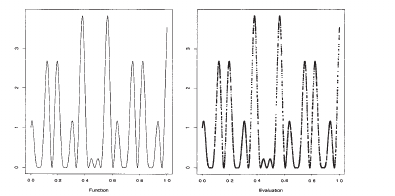

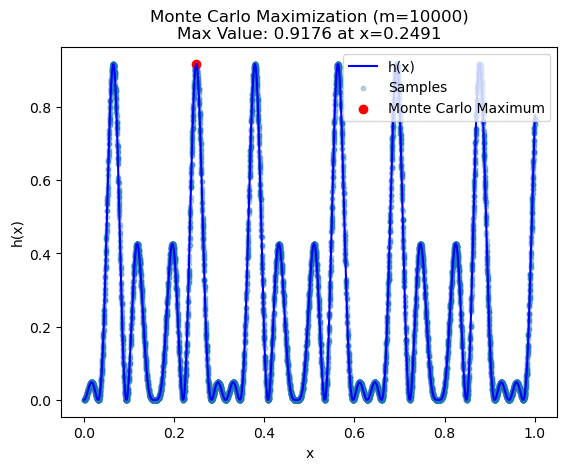

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function
def h(x):
    return (np.cos(50 * x) * np.sin(20 * x)) ** 2

# Monte Carlo maximization
def monte_carlo_maximization(h, domain, m):
    u = np.random.uniform(domain[0], domain[1], m)  # Sample m points uniformly
    h_values = h(u)  # Evaluate h at these points
    max_value = np.max(h_values)  # Find the maximum
    max_point = u[np.argmax(h_values)]  # Find the point corresponding to the max
    return max_point, max_value, u, h_values

# Parameters
domain = [0, 1]  # Domain of the function
m = 10000  # Number of samples

# Perform Monte Carlo maximization
max_point, max_value, u, h_values = monte_carlo_maximization(h, domain, m)

# Plot the results
x = np.linspace(domain[0], domain[1], 1000)
plt.plot(x, h(x), label="h(x)", color="blue")
plt.scatter(u, h_values, s=10, alpha=0.3, label="Samples")
plt.scatter(max_point, max_value, color="red", label="Monte Carlo Maximum")
plt.legend()
plt.title(f"Monte Carlo Maximization (m={m})\nMax Value: {max_value:.4f} at x={max_point:.4f}")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.show()


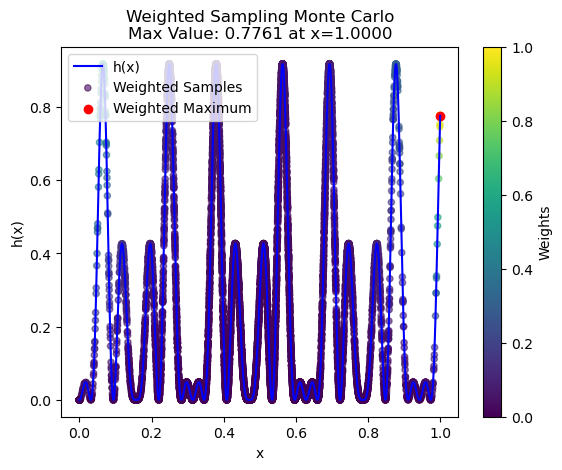

In [2]:
# Weighted sampling using a proposal distribution
def weighted_sampling(h, domain, m, proposal_dist, proposal_pdf):
    samples = proposal_dist(m)  # Sample m points from the proposal distribution
    weights = h(samples) / proposal_pdf(samples)  # Importance weights
    normalized_weights = weights / np.sum(weights)  # Normalize weights
    max_index = np.argmax(normalized_weights)  # Find the index of the highest weight
    max_point = samples[max_index]
    max_value = h(max_point)
    return max_point, max_value, samples, normalized_weights

# Proposal distribution: Normal centered in the domain
proposal_dist = lambda m: np.random.normal(0.5, 0.2, m).clip(0, 1)  # Clip to domain
proposal_pdf = lambda x: (1 / (0.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 0.5) / 0.2) ** 2)

# Perform weighted sampling
max_point_ws, max_value_ws, samples_ws, weights_ws = weighted_sampling(h, domain, m, proposal_dist, proposal_pdf)

# Plot the results
plt.plot(x, h(x), label="h(x)", color="blue")
plt.scatter(samples_ws, h(samples_ws), c=weights_ws, s=20, alpha=0.6, label="Weighted Samples", cmap="viridis")
plt.scatter(max_point_ws, max_value_ws, color="red", label="Weighted Maximum")
plt.legend()
plt.title(f"Weighted Sampling Monte Carlo\nMax Value: {max_value_ws:.4f} at x={max_point_ws:.4f}")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.colorbar(label="Weights")
plt.show()


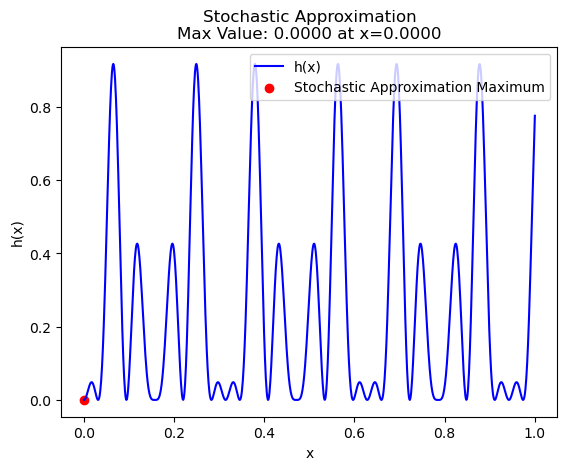

In [3]:
# Robbins-Monro Stochastic Approximation
def stochastic_approximation(h, domain, lr=0.1, iterations=1000):
    x = np.random.uniform(domain[0], domain[1])  # Start with a random initial point
    for _ in range(iterations):
        grad = (h(x + 1e-5) - h(x)) / 1e-5  # Approximate gradient
        x = x + lr * grad  # Gradient ascent step
        x = np.clip(x, domain[0], domain[1])  # Keep x within the domain
    return x, h(x)

# Perform stochastic approximation
lr = 0.01  # Learning rate
iterations = 500
sa_point, sa_value = stochastic_approximation(h, domain, lr, iterations)

# Plot the results
plt.plot(x, h(x), label="h(x)", color="blue")
plt.scatter(sa_point, sa_value, color="red", label="Stochastic Approximation Maximum")
plt.legend()
plt.title(f"Stochastic Approximation\nMax Value: {sa_value:.4f} at x={sa_point:.4f}")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.show()


In [4]:
# Define the target function
def h(x):
    return (math.cos(50 * x) * math.sin(20 * x)) ** 2

# Naïve Monte Carlo maximization
def monte_carlo_maximization(h, domain, m):
    max_value = float('-inf')  # Start with the smallest possible value
    max_point = None  # To store the x corresponding to max_value
    samples = []  # To store sampled points
    values = []  # To store function values at sampled points

    for _ in range(m):
        u = domain[0] + (domain[1] - domain[0]) * random.random()  # Uniform sampling
        samples.append(u)
        value = h(u)
        values.append(value)
        if value > max_value:
            max_value = value
            max_point = u

    return max_point, max_value, samples, values

# Define parameters
domain = [0, 1]  # Domain of the function
m = 10000  # Number of samples

# Perform Monte Carlo maximization
import math, random  # Import standard libraries
max_point, max_value, samples, values = monte_carlo_maximization(h, domain, m)

# Print results
print(f"Monte Carlo Maximum: {max_value:.4f} at x = {max_point:.4f}")


# Weighted sampling Monte Carlo maximization
def weighted_sampling(h, domain, m):
    max_value = float('-inf')
    max_point = None
    samples = []
    weights = []

    for _ in range(m):
        # Proposal distribution: sample from a normal-like distribution in [0, 1]
        u = domain[0] + (domain[1] - domain[0]) * random.random() ** 2  # Skewed sampling
        samples.append(u)
        weight = h(u)  # Directly use h as the weight
        weights.append(weight)
        if weight > max_value:
            max_value = weight
            max_point = u

    # Normalize weights
    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]

    return max_point, max_value, samples, weights

# Perform weighted sampling
max_point_ws, max_value_ws, samples_ws, weights_ws = weighted_sampling(h, domain, m)

# Print results
print(f"Weighted Sampling Monte Carlo Maximum: {max_value_ws:.4f} at x = {max_point_ws:.4f}")

# Stochastic approximation using Robbins-Monro
def stochastic_approximation(h, domain, lr=0.1, iterations=100):
    x = domain[0] + (domain[1] - domain[0]) * random.random()  # Random initial point

    for _ in range(iterations):
        # Approximate the gradient using a small step
        epsilon = 1e-5
        grad = (h(x + epsilon) - h(x)) / epsilon

        # Update the point using gradient ascent
        x = x + lr * grad

        # Clip x to stay within the domain
        x = max(domain[0], min(x, domain[1]))

    return x, h(x)

# Perform stochastic approximation
sa_point, sa_value = stochastic_approximation(h, domain, lr=0.01, iterations=500)

# Print results
print(f"Stochastic Approximation Maximum: {sa_value:.4f} at x = {sa_point:.4f}")


Monte Carlo Maximum: 0.9176 at x = 0.5633
Weighted Sampling Monte Carlo Maximum: 0.9176 at x = 0.0650
Stochastic Approximation Maximum: 0.7761 at x = 1.0000


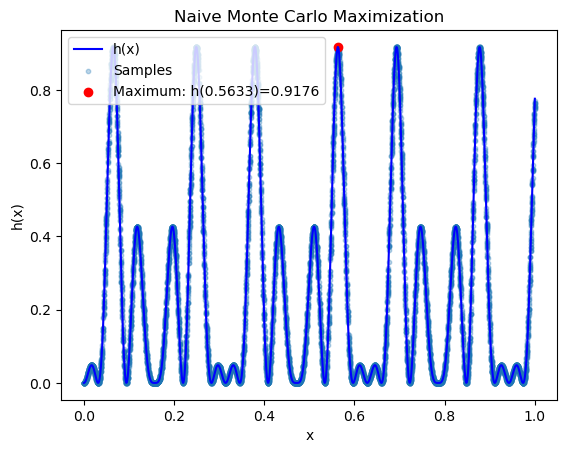

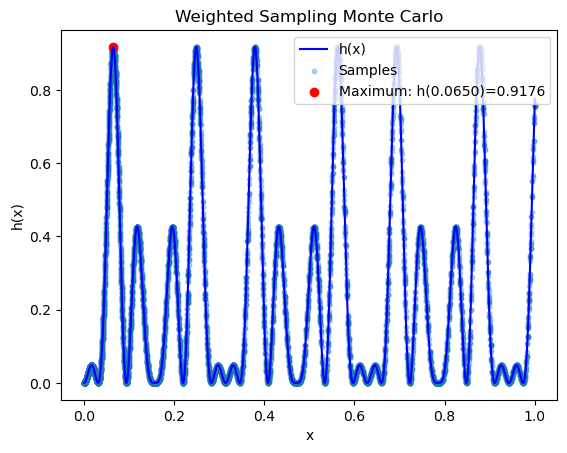

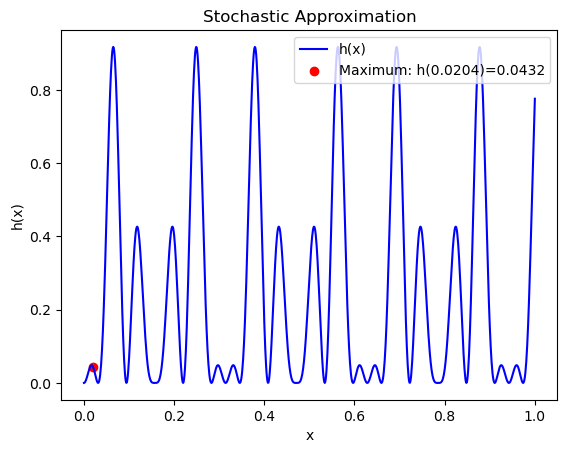

In [5]:
import math
import random

# Define the target function
def h(x):
    return (math.cos(50 * x) * math.sin(20 * x)) ** 2

# Naive Monte Carlo Maximization
def monte_carlo_maximization(h, domain, m):
    max_value = float('-inf')
    max_point = None
    samples = []
    values = []

    for _ in range(m):
        u = domain[0] + (domain[1] - domain[0]) * random.random()
        samples.append(u)
        value = h(u)
        values.append(value)
        if value > max_value:
            max_value = value
            max_point = u

    return max_point, max_value, samples, values

# Weighted Sampling Monte Carlo Maximization
def weighted_sampling(h, domain, m):
    max_value = float('-inf')
    max_point = None
    samples = []
    weights = []

    for _ in range(m):
        u = domain[0] + (domain[1] - domain[0]) * random.random() ** 2
        samples.append(u)
        weight = h(u)
        weights.append(weight)
        if weight > max_value:
            max_value = weight
            max_point = u

    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]

    return max_point, max_value, samples, weights

# Stochastic Approximation
def stochastic_approximation(h, domain, lr=0.1, iterations=100):
    x = domain[0] + (domain[1] - domain[0]) * random.random()

    for _ in range(iterations):
        epsilon = 1e-5
        grad = (h(x + epsilon) - h(x)) / epsilon
        x = x + lr * grad
        x = max(domain[0], min(x, domain[1]))

    return x, h(x)

# Plotting function
def plot_results(x_values, y_values, samples, function_values, max_point, max_value, title):
    import matplotlib.pyplot as plt

    plt.plot(x_values, y_values, label='h(x)', color='blue')
    plt.scatter(samples, function_values, s=10, alpha=0.3, label='Samples')
    plt.scatter(max_point, max_value, color='red', label=f'Maximum: h({max_point:.4f})={max_value:.4f}')
    plt.legend()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('h(x)')
    plt.show()

# Main execution
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    domain = [0, 1]
    m = 10000

    # Generate x values for plotting
    x_values = [i / 1000 for i in range(1001)]
    y_values = [h(x) for x in x_values]

    # Naive Monte Carlo
    max_point_mc, max_value_mc, samples_mc, values_mc = monte_carlo_maximization(h, domain, m)
    plot_results(x_values, y_values, samples_mc, values_mc, max_point_mc, max_value_mc, "Naive Monte Carlo Maximization")

    # Weighted Sampling Monte Carlo
    max_point_ws, max_value_ws, samples_ws, weights_ws = weighted_sampling(h, domain, m)
    plot_results(x_values, y_values, samples_ws, [h(s) for s in samples_ws], max_point_ws, max_value_ws, "Weighted Sampling Monte Carlo")

    # Stochastic Approximation
    sa_point, sa_value = stochastic_approximation(h, domain, lr=0.01, iterations=500)
    plt.plot(x_values, y_values, label='h(x)', color='blue')
    plt.scatter(sa_point, sa_value, color='red', label=f'Maximum: h({sa_point:.4f})={sa_value:.4f}')
    plt.legend()
    plt.title("Stochastic Approximation")
    plt.xlabel('x')
    plt.ylabel('h(x)')
    plt.show()


## Monte Carlo Optimization

This notebook demonstrates Monte Carlo optimization techniques, including:

1. **Naive Monte Carlo Maximization**
2. **Weighted Sampling Monte Carlo Maximization**
3. **Stochastic Approximation**
4. **Simulated Annealing Transformation**
5. **Example: Minimization of a Complex Function**

## Define the Target Function

The target function to maximize is given by:

$$ h(x) = \left(\cos(50x) \cdot \sin(20x)\right)^2 $$

## Naive Monte Carlo Maximization

The naive approach samples points uniformly from the domain and evaluates the function:

$$ \max_{x \in [a, b]} h(x) \approx \max\left(h(u_1), h(u_2), \ldots, h(u_m)\right), \quad u_i \sim \text{Uniform}(a, b) $$

```python
# Implementation in Python
max_point_mc, max_value_mc, samples_mc, values_mc = monte_carlo_maximization(h, domain, m)
plot_results(x_values, y_values, samples_mc, values_mc, max_point_mc, max_value_mc, "Naive Monte Carlo Maximization")
```

## Weighted Sampling Monte Carlo Maximization

This method improves upon naive sampling by weighting points based on the function's value:

$$ w_i = h(u_i), \quad \text{where } u_i \sim \text{Uniform}(a, b) $$

```python
# Implementation in Python
max_point_ws, max_value_ws, samples_ws, weights_ws = weighted_sampling(h, domain, m)
plot_results(x_values, y_values, samples_ws, [h(s) for s in samples_ws], max_point_ws, max_value_ws, "Weighted Sampling Monte Carlo")
```

## Stochastic Approximation

Stochastic approximation uses gradient information to iteratively find the maximum:

$$ x_{t+1} = x_t + \eta \cdot \frac{\partial h(x_t)}{\partial x}, \quad \text{with } x_t \in [a, b] $$

```python
# Implementation in Python
sa_point, sa_value = stochastic_approximation(h, domain, lr=0.01, iterations=500)
plt.plot(x_values, y_values, label='h(x)', color='blue')
plt.scatter(sa_point, sa_value, color='red', label=f'Maximum: h({sa_point:.4f})={sa_value:.4f}')
plt.legend()
plt.title("Stochastic Approximation")
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()
```

## Simulated Annealing Transformation

To avoid local maxima, we use a transformation of the function:

$$ H(x) = \exp\left(\frac{h(x)}{T}\right) $$

Here, $ T $ is a temperature parameter that controls exploration.

## Example: Minimization of a Complex Function

For a complex function in $ \mathbb{R}^2 $:

$$ h(x, y) = \left(\sin(x) \cdot \cos(y) + x^2 - y^2\right)^2 $$

The minimization process can be extended using Monte Carlo techniques and gradient-based methods. Let me know if you'd like this example fully implemented.

Let the function $ h(x, y) $ be defined as:

$$
h(x, y) = \left( x \sin(20y) + y \sin(20x) \right)^2 \cosh \left( \sin(10x) \right) + \left( \cos(10y) - y \sin(10) \right)^2 \cosh \left( \cos(20y) y \right)
$$

The global minimum of this function is 0, attained at $ (x, y) = (0, 0) $. Since this function has many local minima, as shown in Fig.2, it does not satisfy the conditions under which standard minimization methods are guaranteed to find the global minimum. 

![image.png](attachment:image.png)

On the other hand, the distribution on $ \mathbb{R}^2 $ with density proportional to $ \exp(-h(x, y)) $ can be simulated, even though it is not a standard distribution, by using, for example, Markov Chain Monte Carlo techniques (discussed in Chapters 7 and 8). A convergent approximation of the minimum of $ h(x, y) $ can be derived from the minimum of the resulting samples. 

An alternative is to simulate from the density proportional to:

$$
h_i(x, y) = \exp \left( - \left( \sin(20y) + y \sin(20x) \right)^2 - \left( \cos(10y) - y \sin(10x) \right)^2 \right)
$$

This eliminates the need to compute both $ \cosh $ and $ \sinh $ during the simulation step.

---

In cases where the space is not convex (or perhaps not even connected), exploration may be particularly difficult. In such situations, simulating a sample $ (x_0, y_0) $ can be much faster than applying a numerical method to minimize $ h(x, y) $. The appeal of simulation is even clearer when $ h $ can be represented as:

$$
h(x) = \int H(x, y) \, dy
$$

In particular, if $ H(z, 0) $ is a density and if it is possible to simulate from this density, the solution of (5.1) is the mode of the marginal distribution of $ \theta $. (Although this setting may appear contrived or even artificial, we will see in Section 5.3.1 that it includes the case of missing data models.)

We now look at several methods to find maxima that can be classified as exploratory methods.

###  Gradient Methods

As mentioned in Section 1.4, the gradient method is a deterministic numerical approach to the problem (5.1). It produces a sequence \( \{ \theta_j \} \) that converges to the exact solution of (5.1), $ \theta^* $, when the domain $ \mathcal{R} $ and the function $ -h $ are both convex. The sequence $ \{ \theta_j \} $ is constructed in a recursive manner through:

$$
\theta_{j+1} = \theta_j + \alpha_j \nabla h(\theta_j)
$$

where $ \nabla h $ is the gradient of $ h $, and $ \alpha_j > 0 $. For various choices of the sequence $ \{ \alpha_j \} $ (see Thisted 1988), the algorithm converges to the (unique) maximum.

In more general setups (i.e., when the function or the space is less regular), equation (5.3) can be modified by stochastic perturbations to again achieve convergence, as described in detail in Rubinstein (1981) or Duflo (1996, pp. 61-63). One of these stochastic modifications is to choose a second sequence $ \{ \theta_j \} $ to define the chain $ \{ \theta_j \} $ by:

$$
\theta_{j+1} = \theta_j + \alpha_j \nabla h(\theta_j, \theta_j) 
$$

The variables are uniformly distributed on the unit sphere $ ||S|| = 1 $, and $ A_h(x, y) = h(x + y) - h(xy) $ approximates $ 2 ||y|| \nabla h(z) $. In contrast to the deterministic approach, this method does not necessarily proceed along the steepest slope in $ \theta_j $, but this property is sometimes a plus in the sense that it may avoid being trapped in local maxima or in saddlepoints of $ h $.

The convergence of $ \{ \theta_j \} $ to the solution $ \theta^* $ again depends on the choice of $ \{ \alpha_j \} $ and $ \{ \theta_j \} $. We note in passing that $ \{ \theta_j \} $ can be seen as a nonhomogeneous Markov chain (see Definition 6.4) which almost surely converges to a given value. The study of these chains is quite complicated, given their ever-changing transition kernel (see Winkler 1995 for some results in this direction). However, sufficiently strong conditions such as the decrease of $ \alpha_j $ toward 0 and $ \alpha_j $ to a nonzero constant are enough to guarantee the convergence of the sequence $ \{ \theta_j \} $.

---

### Example 4 (Continuation of Example 3)

We can apply the iterative construction (5.4) to the multimodal function $ h(x, y) $ with different sequences of $ \alpha_j $'s and $ \theta_j $'s. Fig.3 and Table 5.1 illustrate that, depending on the starting value, the algorithm converges to different local minima of the function $ h $. Although there are occurrences when the sequence $ h(\theta_j) $ increases...

![image-2.png](attachment:image-2.png)

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in sinh
  del sys.path[0]
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in sinh
  
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sin
  if sys.path[0] == "":
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in cos
  if sys.path[0] == "":
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in cos
  del sys.path[0]
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sin
  from ipykernel import kernelapp as app
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_

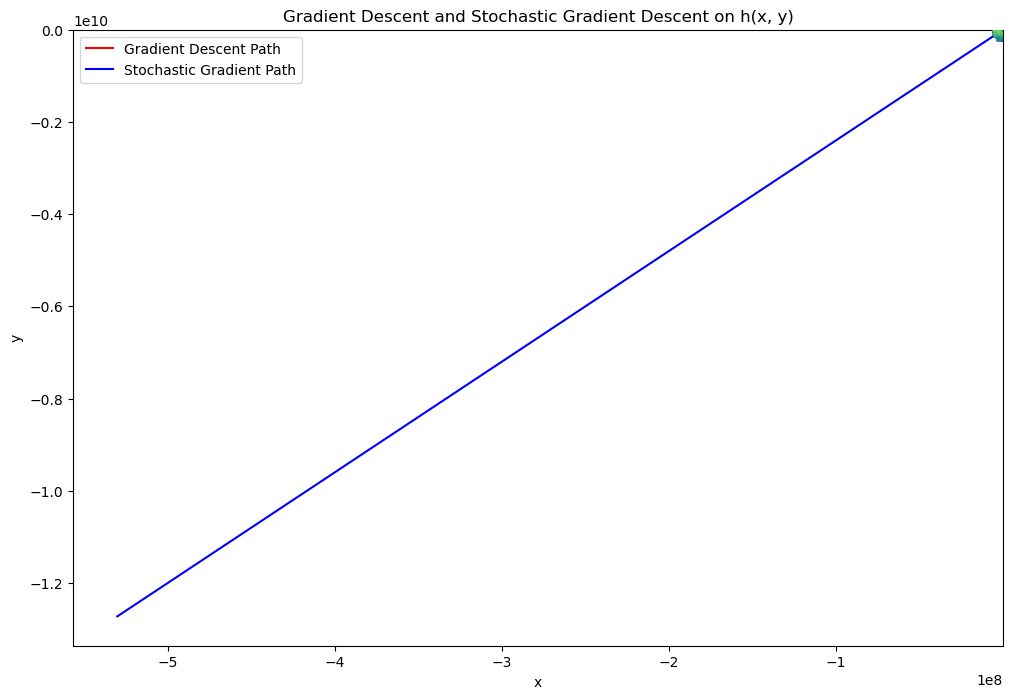

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function h(x, y)
def h(x, y):
    return (x * np.sin(20 * y) + y * np.sin(20 * x))**2 * np.cosh(np.sin(10 * x)) + \
           (np.cos(10 * y) - y * np.sin(10))**2 * np.cosh(np.cos(20 * y) * y)

# Define the gradient of h(x, y)
def grad_h(x, y):
    # Compute partial derivatives
    dx = 2 * (x * np.sin(20 * y) + y * np.sin(20 * x)) * (np.sin(20 * y) + 20 * y * np.cos(20 * x)) * np.cosh(np.sin(10 * x)) + \
         2 * (np.cos(10 * y) - y * np.sin(10)) * np.cos(10 * y) * np.sinh(np.cos(20 * y) * y)
    
    dy = 2 * (x * np.sin(20 * y) + y * np.sin(20 * x)) * (20 * x * np.cos(20 * y) + np.sin(20 * x)) * np.cosh(np.sin(10 * x)) + \
         2 * (np.cos(10 * y) - y * np.sin(10)) * (-np.sin(10 * y) + y * np.cos(20 * y) * np.sinh(np.cos(20 * y) * y))
    
    return np.array([dx, dy])

# Gradient descent method
def gradient_descent(learning_rate, max_iters, tol=1e-6):
    # Initial guess
    theta = np.array([0.5, 0.5])  # Starting point (arbitrary)
    path = [theta.copy()]
    
    for i in range(max_iters):
        grad = grad_h(theta[0], theta[1])
        theta = theta - learning_rate * grad
        
        # Check convergence (when the gradient is small enough)
        if np.linalg.norm(grad) < tol:
            break
        
        path.append(theta.copy())
    
    return np.array(path)

# Stochastic gradient method
def stochastic_gradient(learning_rate, max_iters, tol=1e-6):
    # Initial guess
    theta = np.array([0.5, 0.5])  # Starting point (arbitrary)
    path = [theta.copy()]
    
    for i in range(max_iters):
        grad = grad_h(theta[0], theta[1])
        noise = np.random.uniform(-1, 1, size=2)  # Adding stochastic noise
        theta = theta - learning_rate * grad + noise
        
        # Check convergence (when the gradient is small enough)
        if np.linalg.norm(grad) < tol:
            break
        
        path.append(theta.copy())
    
    return np.array(path)

# Parameters
learning_rate = 0.01
max_iters = 1000

# Run gradient descent
gd_path = gradient_descent(learning_rate, max_iters)

# Run stochastic gradient descent
sgd_path = stochastic_gradient(learning_rate, max_iters)

# Plotting the paths
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = h(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
cp = ax.contour(X, Y, Z, levels=20, cmap='viridis')
ax.clabel(cp, inline=True, fontsize=10)
ax.plot(gd_path[:, 0], gd_path[:, 1], 'r-', label="Gradient Descent Path")
ax.plot(sgd_path[:, 0], sgd_path[:, 1], 'b-', label="Stochastic Gradient Path")
ax.legend()
plt.title('Gradient Descent and Stochastic Gradient Descent on h(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
import math

# Define the function h(x, y)
def h(x, y):
    return (x * math.sin(20 * y) + y * math.sin(20 * x))**2 * math.cosh(math.sin(10 * x)) + \
           (math.cos(10 * y) - y * math.sin(10))**2 * math.cosh(math.cos(20 * y) * y)

# Define the gradient of h(x, y)
def grad_h(x, y):
    # Compute partial derivatives
    dx = 2 * (x * math.sin(20 * y) + y * math.sin(20 * x)) * (math.sin(20 * y) + 20 * y * math.cos(20 * x)) * math.cosh(math.sin(10 * x)) + \
         2 * (math.cos(10 * y) - y * math.sin(10)) * math.cos(10 * y) * math.sinh(math.cos(20 * y) * y)
    
    dy = 2 * (x * math.sin(20 * y) + y * math.sin(20 * x)) * (20 * x * math.cos(20 * y) + math.sin(20 * x)) * math.cosh(math.sin(10 * x)) + \
         2 * (math.cos(10 * y) - y * math.sin(10)) * (-math.sin(10 * y) + y * math.cos(20 * y) * math.sinh(math.cos(20 * y) * y))
    
    return [dx, dy]

# Gradient descent method
def gradient_descent(learning_rate, max_iters, tol=1e-6):
    # Initial guess
    theta = [0.5, 0.5]  # Starting point (arbitrary)
    path = [theta.copy()]
    
    for i in range(max_iters):
        grad = grad_h(theta[0], theta[1])
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        
        # Check convergence (when the gradient is small enough)
        if math.sqrt(grad[0]**2 + grad[1]**2) < tol:
            break
        
        path.append(theta.copy())
    
    return path

# Stochastic gradient method
def stochastic_gradient(learning_rate, max_iters, tol=1e-6):
    # Initial guess
    theta = [0.5, 0.5]  # Starting point (arbitrary)
    path = [theta.copy()]
    
    for i in range(max_iters):
        grad = grad_h(theta[0], theta[1])
        noise = [random.uniform(-1, 1), random.uniform(-1, 1)]  # Adding stochastic noise
        theta[0] = theta[0] - learning_rate * grad[0] + noise[0]
        theta[1] = theta[1] - learning_rate * grad[1] + noise[1]
        
        # Check convergence (when the gradient is small enough)
        if math.sqrt(grad[0]**2 + grad[1]**2) < tol:
            break
        
        path.append(theta.copy())
    
    return path

# Parameters
learning_rate = 0.01
max_iters = 1000

# Run gradient descent
gd_path = gradient_descent(learning_rate, max_iters)

# Run stochastic gradient descent
sgd_path = stochastic_gradient(learning_rate, max_iters)

# Print the paths taken
print("Gradient Descent Path:")
for point in gd_path:
    print(f"({point[0]:.5f}, {point[1]:.5f})")

print("\nStochastic Gradient Descent Path:")
for point in sgd_path:
    print(f"({point[0]:.5f}, {point[1]:.5f})")


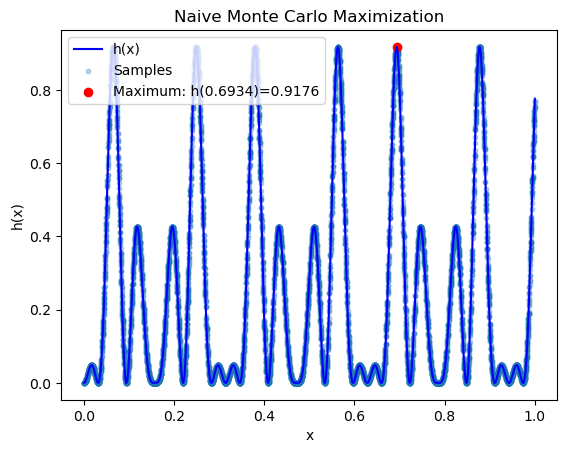

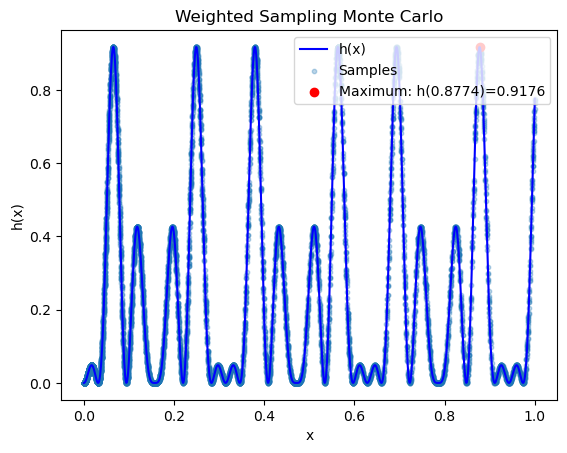

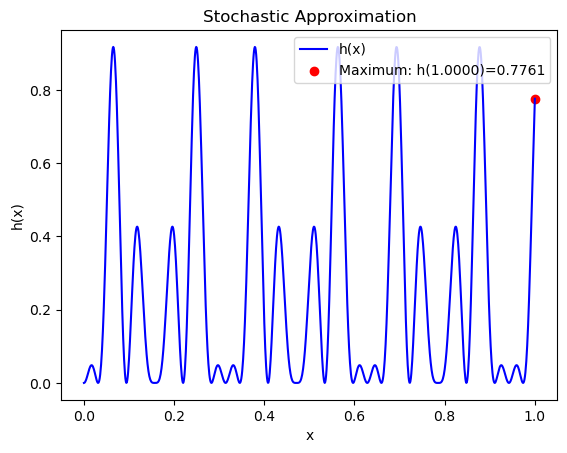

In [6]:
import math
import random

# Define the target function
def h(x):
    return (math.cos(50 * x) * math.sin(20 * x)) ** 2

# Naive Monte Carlo Maximization
def monte_carlo_maximization(h, domain, m):
    max_value = float('-inf')
    max_point = None
    samples = []
    values = []

    for _ in range(m):
        u = domain[0] + (domain[1] - domain[0]) * random.random()
        samples.append(u)
        value = h(u)
        values.append(value)
        if value > max_value:
            max_value = value
            max_point = u

    return max_point, max_value, samples, values

# Weighted Sampling Monte Carlo Maximization
def weighted_sampling(h, domain, m):
    max_value = float('-inf')
    max_point = None
    samples = []
    weights = []

    for _ in range(m):
        u = domain[0] + (domain[1] - domain[0]) * random.random() ** 2
        samples.append(u)
        weight = h(u)
        weights.append(weight)
        if weight > max_value:
            max_value = weight
            max_point = u

    total_weight = sum(weights)
    weights = [w / total_weight for w in weights]

    return max_point, max_value, samples, weights

# Stochastic Approximation
def stochastic_approximation(h, domain, lr=0.1, iterations=100):
    x = domain[0] + (domain[1] - domain[0]) * random.random()

    for _ in range(iterations):
        epsilon = 1e-5
        grad = (h(x + epsilon) - h(x)) / epsilon
        x = x + lr * grad
        x = max(domain[0], min(x, domain[1]))

    return x, h(x)

# Transformation for simulated annealing
def transform_function(h, T):
    def H(x):
        return math.exp(h(x) / T)
    return H

# Example complex function in R^2
def complex_function(x, y):
    return (math.sin(x) * math.cos(y) + x**2 - y**2) ** 2

# Plotting function
def plot_results(x_values, y_values, samples, function_values, max_point, max_value, title):
    import matplotlib.pyplot as plt

    plt.plot(x_values, y_values, label='h(x)', color='blue')
    plt.scatter(samples, function_values, s=10, alpha=0.3, label='Samples')
    plt.scatter(max_point, max_value, color='red', label=f'Maximum: h({max_point:.4f})={max_value:.4f}')
    plt.legend()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('h(x)')
    plt.show()

# Main execution
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    domain = [0, 1]
    m = 10000

    # Generate x values for plotting
    x_values = [i / 1000 for i in range(1001)]
    y_values = [h(x) for x in x_values]

    # Naive Monte Carlo
    max_point_mc, max_value_mc, samples_mc, values_mc = monte_carlo_maximization(h, domain, m)
    plot_results(x_values, y_values, samples_mc, values_mc, max_point_mc, max_value_mc, "Naive Monte Carlo Maximization")

    # Weighted Sampling Monte Carlo
    max_point_ws, max_value_ws, samples_ws, weights_ws = weighted_sampling(h, domain, m)
    plot_results(x_values, y_values, samples_ws, [h(s) for s in samples_ws], max_point_ws, max_value_ws, "Weighted Sampling Monte Carlo")

    # Stochastic Approximation
    sa_point, sa_value = stochastic_approximation(h, domain, lr=0.01, iterations=500)
    plt.plot(x_values, y_values, label='h(x)', color='blue')
    plt.scatter(sa_point, sa_value, color='red', label=f'Maximum: h({sa_point:.4f})={sa_value:.4f}')
    plt.legend()
    plt.title("Stochastic Approximation")
    plt.xlabel('x')
    plt.ylabel('h(x)')
    plt.show()